# Final Project 
**Due Dec 15 at 6 pm**

25% of the grade.

1. Design the specified database schema.
    - Normalized tables: make clear what entity type corresponds to each table
    - Entity integrity: well-chosen primary key, 1-to-1 correspondence to the real world.
    - Dependencies using foreign keys. Model relationships that correspond to the rules.
    - Ensure that the database enforces all the rules and logic of the enterprise.
    - Define additional unique indexes if necessary 
    
2. Scripts to populate the tables
    - Define functions that define real-world transactions.
    - Use serializable transactions if necessary. 
    - Use these functions in a simulation for a large number of diverse transactions.
    - Populate all tables with enough data for meaningful queries.
    
3. Interesting queries
    - Create eight meaningful queries.
    - Five queries will be given in the assignment and you will need to come up with at least three more of equal complexity.
    - Make sure that you find queries that use joins, subqueries, and aggregation functions.
    - Each query should be implemented as a single database query with no postprocessing required.
    

### Impelementation
Implement the assignment in Python. Jupyter is okay. 

**Option 1.** Use SQL with `pymysql`. *Do not* use the `%%sql` matgic.

**Option 2.** Use DataJoint for design, and diagrams, and queries. Provide equivalent SQL for two `CREATE TABLE` queries and two `SELECT` queries.

Submit as a PDF containing the three sections. Explain how you accomplished each rule.


# Option 1: Airline reservations and ticketing

### Entities
* Passenger
* Aircraft Type
* Seats
* Airports
* Flights
* Reservations
* Checkin

### Rules and Operations

1. **Passengers** are identified by a surrogate key (int, uuid) but ensure uniqueness through a secondary index. Date of birth, citizenship, id type, and id number. 
1. **Seat** arrangements are defined for each **Aircraft Type**, have a seat number such as 1A, 33F and class (Economy, Business, and 1st Class). 
1. **Airports** (identifed by codes) have coordinates (lattitude and longitude). `IAH`, `HOU`, `LAX`, `JFK`, `DCA`, `SAN`, `SEA`, `LAS`, `SLC`. Use at least seven.
1. **Flights** departure time, **Aircraft Type**, Origin (airport code), Destination (airport code), distance, arrival time, economy price.
1. **Reservations** are for direct **Flights** only and for one **Passenger** only = 1 seat, assigned to a seat, price is the flight price x1.5 for business, x2.0 for 1st class. Write the function `reserve_seat` that implements the purchase of a reservation. 
1. **Seats on flights** Available are seats are defined from the **Aircarft Type**.
1. **Check-in** is performed for a reservation and must be within 24 hours before the flight but not after. 

### Data
Populate at least `n^1.5` of flights per day where `n` is the number of airports, for at least 1 month.
Populate flights to be on average at least 75% full, but randomize.

### Example Queries


Write at least 8 interesting queries. 

1. Show the flight schedule between two cities between two dates.
2. All cities with direct flights from a given airport (e.g. from IAH) or from two airports (e.g. IAH and HOU) between two dates. "To what cities can I fly from New York in the next two days?"
3. Next available (has seats) flight between given cities.
4. For each passenger, report total miles traveled and money spent.
5. Report occupancy rate (%full) for all flights between two cities within a given period.
6. -- be creative --
7. -- be creative --
8. -- be creative --

# Stock Exchange

### Entitities and rules
- **Trader Account**: cash balance
- **Publicly traded companies**: Identified by ticker symbol (`IBM`, `AAPL`, `TSLA`, `GE`, `NKE`, `ZM`, `AMZN`, `GM`, `T`). Use at least 10.
- **Stock position**: number of stock shares of a **Public Company** in a **Trader Account**.
- **Withdrawals and deposits**: money in and into **Trader Account** without changing stock positions.
- **Stop order**: Sell or Buy, ticker symbol, number of shares, price
- **Market order**: Sell or Buy, ticker symbol, number of share. 
- **Transactions**: A transaction occurs when a market order is placed and there is stop order for the same company of the opposite buy/sell category.

### Rules
1. Define the `place_order` function: stop/market, buy/sell, ticker, and number.
2. Write a separate function `exchange` that finds matching stop orders and market orders and performs the exchange.  Be sure to use an ACID transaction. Correctly select buyer/seller: the market order gets the best available stop order. Subtract and add cash from the trader accounts. Do not proceed if buyer has insufficient cash.
3. A buy market order should limit the price to available cash / number of shares.
4. No transaction should result in a negative cash balance.

### Data
1. At least 10 companies
2. At least 100 trader accounts
3. Randomly generate stop orders and market orders, at least 10 orders per trader account per week.
4. Run the simulation for 1 year.


### Queries
1. Show the current prices of all stocks.
2. Plot the stock price across time for a given ticker symbol (average stock price for all transctions per day)
3. Plot the index the average of all prices. Averaging is for the day.
4. Show the current value of a trader account: All stocks shares * current price.
5. Report trade volumes sum(shares * price) for each stock for a given date.
6. -- be creative --
7. -- be creative --
8. -- be creative --


## Discussion on implementation 
not part of the assignment

In [4]:
import datajoint as dj

In [5]:
schema = dj.schema('dimitri_airline')

Connecting dimitri@db.data-science-ust.net:3306


In [6]:
@schema
class Aircraft(dj.Lookup):
    definition =  """
    aircraft :  varchar(16) 
    """
    
    contents = [['Boeing 737-8Max'], ['A320'], ['Embraer170']]

In [7]:
Aircraft()

aircraft
A320
Boeing 737-8Max
Embraer170


In [8]:
@schema
class Seat(dj.Manual):
    definition = """
    -> Aircraft
    seat  : char(3)
    ---
    class : enum('Economy', 'Business', 'First Class')
    """

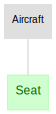

In [9]:
dj.Diagram(schema)

In [10]:
aircraft = "A320"

klass = "First Class" 
Seat.insert(({'aircraft': aircraft, 
                      "seat": str(row)+seat, 
                      "class": klass} 
            for row in range(1, 7)
            for seat in "ABC"), skip_duplicates=True)

klass = "Business" 
Seat.insert(({'aircraft': aircraft, 
                      "seat": str(row)+seat, 
                      "class": klass} 
            for row in range(7, 12)
            for seat in "ABCD"), skip_duplicates=True)

klass = "Economy" 
Seat.insert(({'aircraft': aircraft, 
                      "seat": str(row)+seat, 
                      "class": klass} 
            for row in range(12, 31)
            for seat in "ABCDEF"), skip_duplicates=True)

In [11]:
Seat()

aircraft,seat,class
A320,10A,Business
A320,10B,Business
A320,10C,Business
A320,10D,Business
A320,11A,Business
A320,11B,Business
A320,11C,Business
A320,11D,Business
A320,12A,Economy
A320,12B,Economy


In [39]:
@schema
class Airport(dj.Lookup):
    definition = """
    airport_code : char(3)
    ---
    airport_name : varchar(30)
    lattitude   : float  # (degrees)
    longitude   : float  # (degrees)
    """
    contents = (("IAH", "George Bush International", +29.9902, -95.3368),
                ("HOU", "Hobby Airport", 29.6459, -95.2769),
                ("LAX", "Los Angeles International", 33.9416, -118.4085),)

In [40]:
Airport()

airport_code,airport_name,lattitude (degrees),longitude (degrees)
HOU,Hobby Airport,29.6459,-95.2769
IAH,George Bush International,29.9902,-95.3368
LAX,Los Angeles International,33.9416,-118.409


In [48]:
@schema
class Flight(dj.Manual):
    definition = """
    flight_no  : int
    ---
    -> Airport.proj(origin_code="airport_code")
    -> Airport.proj(dest_code="airport_code")
    -> Aircraft
    economy_price: decimal(6, 2)
    departure_datetime : datetime
    arrival_datetime : datetime
    """

In [ ]:
Equivalent SQL:
    
    CREATE TABLE IF NOT EXISTS `flight` (
    `flight_no` int not null, 
    `dest_code` char(3) not null,
    `origin_code` char(3) not null,
    `aircraft` varchar(16) not null,
    `econonmy_price` decimal(6, 2) not null,
    `departure_datetime` datetime not null, 
    `arrival_datetime` datetime not null,
    PRIMARY KEY (`flight_no`),
    FOREIGN KEY (`origin_code`) REFERENCES `airport`(`airport_code`),
    FOREIGN KEY (`dest_code`) REFERENCES `airport`(`airport_code`),
    FOREIGN KEY (`aircraft`) REFERENCES `aircraft`(`aircraft`)
    )
    

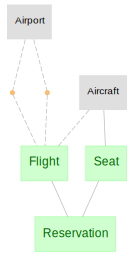

In [51]:
dj.Diagram(schema)

In [50]:
@schema
class Reservation(dj.Manual):
    definition = """
    -> Flight
    -> Seat
    ---
    """

In [52]:
Flight * Reservation * Seat

flight_no,aircraft,seat,dest_code,origin_code,economy_price,departure_datetime,arrival_datetime,class


In [12]:
import pymysql
import json

with open('cred.json') as f:
    creds=json.load(f)

    # establish a database connection
conn = pymysql.connect(
    host=creds['host'], 
    user=creds['user'], 
    passwd=creds['password'])

In [13]:
cur = conn.cursor()

In [16]:
cur.execute('CREATE DATABASE IF NOT EXISTS `dimitri_air`')

0

In [17]:
cur.execute('USE `dimitri_air`')

0

In [20]:
cur.execute("""
CREATE TABLE IF NOT EXISTS `aircraft` (
aircraft varchar(16) NOT NULL,
PRIMARY KEY (aircraft)
)
""")

0

In [26]:
e

NameError: name 'e' is not defined

In [29]:
for craft in ('Boeing 737-8Max', 'A320', 'Embraer170'):
    try:
        cur.execute("INSERT INTO aircraft VALUES (%s)", (craft,))
    except pymysql.IntegrityError as err:
        if err.args[0] == 1062:
            print('Skipping duplicate')


Skipping duplicate
Skipping duplicate
Skipping duplicate


In [30]:
cur.execute('SELECT * FROM aircraft')
cur.fetchall()

(('A320',), ('Boeing 737-8Max',), ('Embraer170',))

In [32]:
cur.execute("""
CREATE TABLE IF NOT EXISTS `seat` (
aircraft varchar(16) NOT NULL,
seat char(3) NOT NULL,
class enum('Economy', 'Business', 'First Class') NOT NULL,
PRIMARY KEY (aircraft, seat),
FOREIGN KEY (aircraft) REFERENCES aircraft(aircraft) 
)
""")

0

In [35]:
aircraft = "A320"

klass = "First Class" 

for row in range(1, 7):
    for seat in "ABC":
        cur.execute("""
        INSERT IGNORE INTO `seat` (`aircraft`, `class`, `seat`) 
        VALUES (%s, %s, %s)""", (aircraft, klass, str(row) + seat))

## Stock exchange starter

In [37]:
schema = dj.schema("dimitri_exchange")

In [38]:
@schema
class Company(dj.Manual):
    definition = """
    ticker : char(5)
    ---
    company_name : varchar(50)
    """

In [39]:
@schema
class TraderAccount(dj.Manual):
    definition = """
    account : int 
    ---
    primary_owner : varchar(128)
    """